<a href="https://colab.research.google.com/github/MEGNEOrnela/My_medium_Posts/blob/main/Voice_features_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [ ]:
# !pip install librosa

In [12]:
import pandas as pd
import numpy as np
import librosa
import os

from sklearn.model_selection import train_test_split

import librosa.display
from IPython.display import Audio
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load the voice file

[Link](https://github.com/LIHVOICE/Predi_COVID_Fatigue_Vocal_Biomarker/blob/main/Datasets/iOS_audioset.csv) to download the iOS_audioset

In [3]:
voice_file_name = 'path_to/iOS_audioset.csv'
data = pd.read_csv(voice_file_name)
data

,participant,sex,age,ID_short,format,audio_type,fatigue
0,PREDI_0044,1.0,22.0,Predi-COVID_0044_20200518133554_1_m4a_M_0,m4a,type1,False
1,PREDI_0044,1.0,22.0,Predi-COVID_0044_20200518133554_2_m4a_M_0,m4a,type2,False
2,PREDI_0066,1.0,39.0,Predi-COVID_0066_20200625035612_1_m4a_M_0,m4a,type1,False
3,PREDI_0066,1.0,39.0,Predi-COVID_0066_20200625035612_2_m4a_M_0,m4a,type2,False
4,PREDI_0066,1.0,39.0,Predi-COVID_0066_20200624051407_1_m4a_M_0,m4a,type1,False
...,...,...,...,...,...,...,...
2161,PREDI_2729,0.0,40.0,Predi-COVID_2729_20210819163511_2_m4a_W_0,m4a,type2,False
2162,PREDI_2729,0.0,40.0,Predi-COVID_2729_20210818140323_1_m4a_W_1,m4a,type1,True
2163,PREDI_2729,0.0,40.0,Predi-COVID_2729_20210818140323_2_m4a_W_1,m4a,type2,True
2164,PREDI_2732,1.0,33.0,Predi-COVID_2732_20210825095624_1_m4a_M_1,m4a,type1,True


In [4]:
#Get the two different types of audio record by the participants
data1 = data.loc[data['audio_type'] == 'type1'] #for type1 audios
data2 = data.loc[data['audio_type'] == 'type2'] #for type2 audios

- [Link](https://drive.google.com/drive/folders/1SFpURT3GHyBtvsVj477wdM2R2ag-iE7q?usp=sharing) to Predi_Covid_audios used here
- [Link](https://zenodo.org/records/5937844#.YfpO6-rMJdg) to the entire dataset

In [6]:
#set the path where the voice has been store and get all the names of the voices
global_path = "path_to/Predi_Covid_audios/"

voice_name_ = os.listdir(global_path)

voice_name = []
for i in voice_name_:
  voice_name.append(i.split('.')[0])

print(voice_name)

['Predi-COVID_0044_20200518133554_1_m4a_M_0', 'Predi-COVID_0044_20200518133554_2_m4a_M_0', 'Predi-COVID_0066_20200611134530_1_m4a_M_0', 'Predi-COVID_0066_20200611134530_2_m4a_M_0', 'Predi-COVID_0066_20200612072315_1_m4a_M_0', 'Predi-COVID_0066_20200612072315_2_m4a_M_0', 'Predi-COVID_0066_20200613082517_2_m4a_M_0', 'Predi-COVID_0066_20200613082517_1_m4a_M_0', 'Predi-COVID_0066_20200614080017_2_m4a_M_0', 'Predi-COVID_0066_20200614080017_1_m4a_M_0', 'Predi-COVID_0066_20200615070238_1_m4a_M_0', 'Predi-COVID_0066_20200615070238_2_m4a_M_0', 'Predi-COVID_0066_20200616111802_1_m4a_M_0', 'Predi-COVID_0066_20200616111802_2_m4a_M_0', 'Predi-COVID_0066_20200617080637_1_m4a_M_0', 'Predi-COVID_0066_20200617080637_2_m4a_M_0', 'Predi-COVID_0066_20200618054432_1_m4a_M_0', 'Predi-COVID_0066_20200619094832_1_m4a_M_0', 'Predi-COVID_0066_20200618054432_2_m4a_M_0', 'Predi-COVID_0066_20200619094832_2_m4a_M_0', 'Predi-COVID_0066_20200620054354_1_m4a_M_0', 'Predi-COVID_0066_20200623053206_1_m4a_M_0', 'Predi-CO

#### Since there are two types of recording per patient, here we extract and store type1 and type2 audios into numpy arrays separately

In [7]:
sound_data1 = []
sound_data2 = []
file_name = []
for file_name1, file_name2 in zip(data1['ID_short'], data2['ID_short']):

  if (file_name1 in voice_name) and (file_name2 in voice_name):
    current_sound1,_ =  librosa.load("path_to/Predi_Covid_audios/{}.wav".format(file_name1), sr=8000)
    current_sound2,_ =  librosa.load("path_to/Predi_Covid_audios/{}.wav".format(file_name2), sr=8000)
    sound_data1.append(current_sound1)
    sound_data2.append(current_sound2)
    file_name.append(file_name1)
    file_name.append(file_name2)
sound_data1 = np.array(sound_data1, dtype=object)
sound_data2 = np.array(sound_data2, dtype=object)

In [8]:
'''
Only a small sample (110) of the data has been load, then here we only extract and keep this sample from the entire voice file
'''

df = data[data['ID_short'].isin(file_name)]
df.head()

,participant,sex,age,ID_short,format,audio_type,fatigue
0,PREDI_0044,1.0,22.0,Predi-COVID_0044_20200518133554_1_m4a_M_0,m4a,type1,False
1,PREDI_0044,1.0,22.0,Predi-COVID_0044_20200518133554_2_m4a_M_0,m4a,type2,False
2,PREDI_0066,1.0,39.0,Predi-COVID_0066_20200625035612_1_m4a_M_0,m4a,type1,False
3,PREDI_0066,1.0,39.0,Predi-COVID_0066_20200625035612_2_m4a_M_0,m4a,type2,False
8,PREDI_0066,1.0,39.0,Predi-COVID_0066_20200622055207_1_m4a_M_0,m4a,type1,False


In [9]:
df.shape

(110, 7)

### waveform vizualization of a voice from a random participant

In [14]:
audio = Audio(data=sound_data1[0], rate=8000)
display(audio)

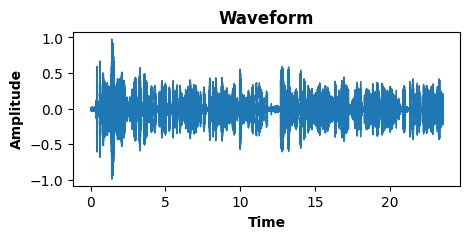

In [49]:
plt.figure(figsize=(5,2))
librosa.display.waveshow(sound_data1[0], sr=8000)
plt.title('Waveform',fontweight='bold');
plt.xlabel('Time', fontweight='bold');
plt.ylabel('Amplitude', fontweight='bold');

### Spectrum plot of a voice from a random participant

The fast Fourier transform (FFT) is an algorithm that can efficiently compute the Fourier transform. Here we applied the algorithm on a windowed segment of the given audio.

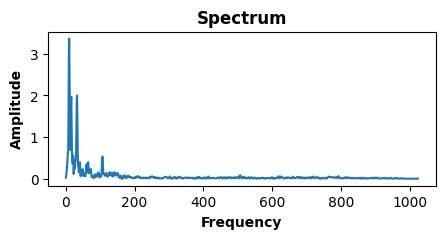

In [50]:
n_fft = 2048
plt.figure(figsize=(5,2))
ft = np.abs(librosa.stft(sound_data1[0][:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum',fontweight='bold');
plt.xlabel('Frequency',fontweight='bold');
plt.ylabel('Amplitude',fontweight='bold');

The FFT allowed us to see the frequency of the signal, but no information is provided in the case where the frequency content varies over time. Consiquently, we need a way to represent the spectrum of the signal as he varies over time.

This will be done through short-time Fourier transform (STFT), which is a sequence of Fourier transforms, which convert a waveform into a spectrogram.

### Spectrogram of a voice from a random participant

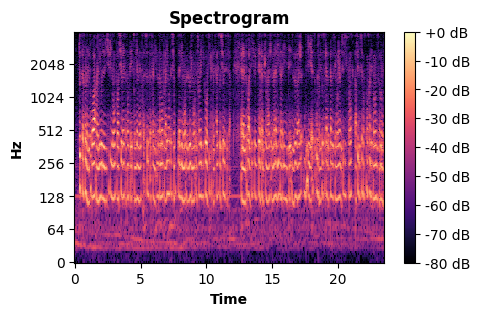

In [52]:
spec = np.abs(librosa.stft(sound_data1[0], hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
plt.figure(figsize=(5,3))
librosa.display.specshow(spec, sr=8000, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram',fontweight='bold');
plt.xlabel('Time', fontweight='bold');
plt.ylabel('Hz', fontweight='bold');

There are some additional details going on behind the scenes when computing the spectrogram. The y-axis is converted to a log scale, and the color dimension is converted to decibels.

Since humans are better at detecting differences in low frequencies than higher frequencies, these frequencies are converted to mel scale, resulting in the Mel spectrogram

### Mel spectrogram

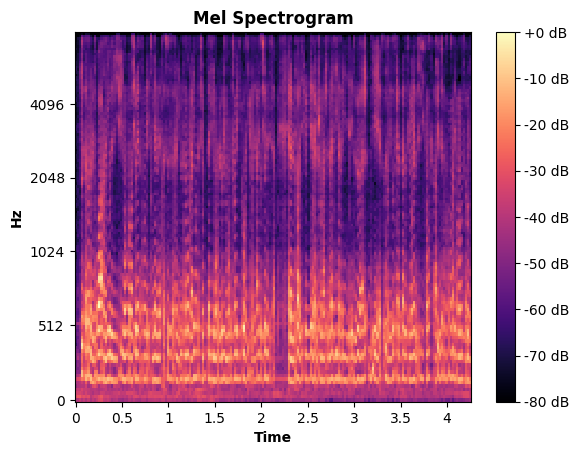

In [24]:
mel_spect = librosa.feature.melspectrogram(y=sound_data1[0], sr=8000, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram',fontweight='bold');
plt.colorbar(format='%+2.0f dB');
plt.xlabel('Time', fontweight='bold');
plt.ylabel('Hz', fontweight='bold');

## Feature extraction (time-frequency domain features)

### Here we concatenate type 1 and type 2 audios for each participant to have more informations.



In [25]:
Audios_final = []
for x, y in zip(sound_data1, sound_data2):
    combined_segment = np.hstack((x,y))
    Audios_final.append(combined_segment)
Audios_final = np.array(Audios_final, dtype=object)

#### 1. Generating mel-spectrograms


When you listen to analog audio (e.g., when you hear someone speak), it's a continuous wave of sound with varying amplitude and frequency. To work with audio on a computer, it needs to be digitized. This involves taking "snapshots" of the audio wave at regular intervals. The sampling rate (sr) defines how many of these snapshots are taken per second.

- n_fft specified how many samples from audio signal  are included in each Forurier transform analysis frame (ie n_fft sets the length of the Fast Fourier transform window).
- hop_length determines how much the analysis frames overlap with each other in time (it describes the number of samples between the starting points of successive frames ).

Example: Imagine you have a long piece of text and you want to analyze it in smaller sections. "n_fft" is like the size of each section you choose to analyze, and "hop_length" is how much you move your analysis window forward after each section.

- mel scale transform the frequency into human hearing range. n_mels  allows  to specify how many Mel frequency bands  to divide the frequency spectrum into.

In [26]:
mel_spectrograms = []
for x in Audios_final:
  mel_spectrogram_ = librosa.feature.melspectrogram(y=x, sr=8000,  n_fft=4096, hop_length=2048, n_mels = 196)
  log_mel_spectrogram_ = librosa.power_to_db(mel_spectrogram_)
  mel_spectrograms.append(log_mel_spectrogram_)

#### visualization of mel-spectrograms when combining the two type recordings for a random participant

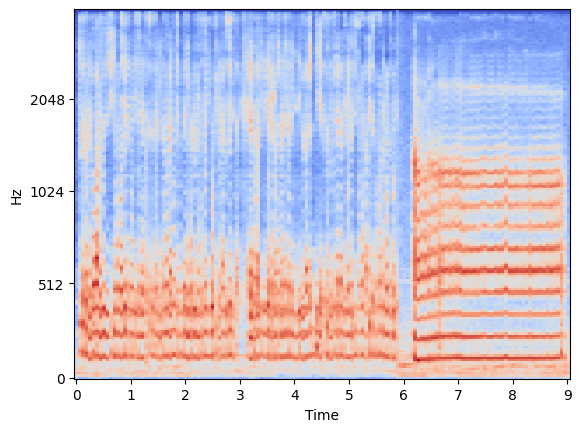

In [27]:
ml = librosa.display.specshow(mel_spectrograms[0],
                         x_axis="time",
                         y_axis="mel",
                         sr=8000)
#plt.colorbar(format="%+2.f")

plt.show()

### 2. mel-frequency cepstral coefficients (MFCCs) that work within the human hearing range.

MFCCs are derived from the Mel spectrogram by applying a series of mathematical transformations, including taking the discrete cosine transform (DCT). The resulting MFCCs are a compact representation of the audio signal's spectral characteristics and can capture important features.

In [ ]:
mfccs = []    #to store the mfccs
mfccs_scaled = []     #to store the scaled mfccs
mfccs_features = []   #to store the features extracted for each voice signal

for x in Audios_final:
  mfccs_ = librosa.feature.mfcc(y=x, sr=8000, n_mfcc=40)
  mfccs_scaled_ = sklearn.preprocessing.scale(mfccs_, axis=1)
  mfccs_feature = list(np.mean(mfccs_scaled_, axis=1))
  mfccs.append(mfccs_)
  mfccs_scaled.append(mfccs_scaled_)
  mfccs_features.append(mfccs_feature)

(40, 568)


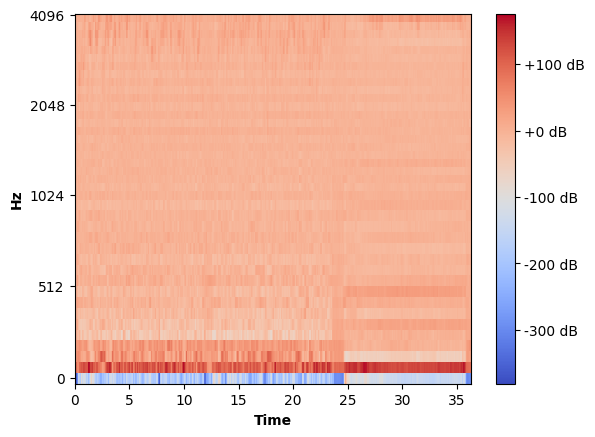

In [56]:
print(mfccs[0].shape)
librosa.display.specshow(mfccs[0], sr=8000, x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB');
plt.xlabel('Time', fontweight='bold');
plt.ylabel('Hz', fontweight='bold');

- 40 is the number of features
- 568 is the number of frequency bands for this specific signal

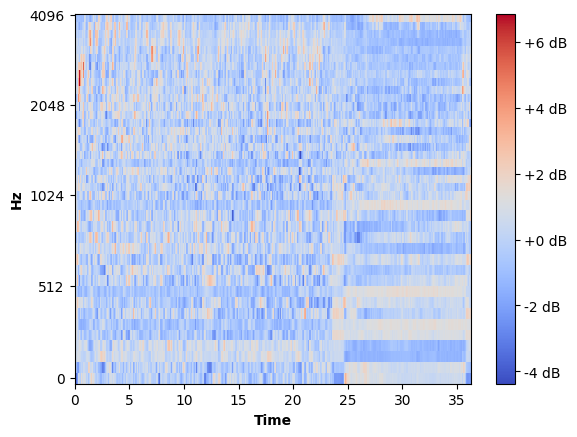

In [55]:
#Spectrogram of the scaled mfccs
librosa.display.specshow(mfccs_scaled[0], sr=8000, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB');
plt.xlabel('Time', fontweight='bold');
plt.ylabel('Hz', fontweight='bold');

## Combined the audio and the corresponding features into a dataframe

In [31]:
select_voice = data[data['ID_short'].isin(file_name)]
select_voice.index=select_voice['ID_short']

new_file = {}
for name in file_name:
  new_file[name.split('m4a')[0][:-3]]=select_voice.loc[name]['fatigue']

df = pd.DataFrame(mfccs_features, columns=[f'MFCC_{i+1}' for i in range(len(mfccs_features[0]))])
df.index = list(new_file.keys())
df['fatigue'] = list(new_file.values())

In [57]:
df.head()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,MFCC_32,MFCC_33,MFCC_34,MFCC_35,MFCC_36,MFCC_37,MFCC_38,MFCC_39,MFCC_40,fatigue
Predi-COVID_0044_20200518133554,-6.716016e-09,1.343203e-08,0.0,-2.686406e-08,-2.686406e-08,-2.686406e-08,6.716016e-09,0.000000e+00,-2.686406e-08,5.037012e-09,...,-6.716016e-09,-6.716016e-09,1.343203e-08,-6.716016e-09,-1.343203e-08,0.000000e+00,0.000000e+00,0.000000e+00,-2.686406e-08,0
Predi-COVID_0066_20200625035612,-4.623875e-08,-8.669766e-09,0.0,-2.311938e-08,0.000000e+00,0.000000e+00,0.000000e+00,-2.311938e-08,0.000000e+00,0.000000e+00,...,2.311938e-08,-2.889922e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.779844e-09,-4.623875e-08,0.000000e+00,0
Predi-COVID_0066_20200622055207,0.000000e+00,2.314744e-09,0.0,0.000000e+00,9.258974e-09,-1.851795e-08,-9.258974e-09,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.851795e-08,-5.786859e-09,-9.258974e-09,1.851795e-08,0.000000e+00,9.258974e-09,1.851795e-08,0.000000e+00,-9.258974e-09,0
Predi-COVID_0066_20200620054354,5.327789e-09,2.131116e-08,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-5.327789e-09,0.000000e+00,0.000000e+00,2.131116e-08,...,-4.262231e-08,-1.065558e-08,0.000000e+00,-1.165454e-08,0.000000e+00,0.000000e+00,-1.065558e-08,0.000000e+00,0.000000e+00,0
Predi-COVID_0066_20200619094832,1.006896e-08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-2.301477e-08,0.000000e+00,4.602953e-08,0.000000e+00,...,0.000000e+00,-1.150738e-08,5.753691e-09,1.150738e-08,-1.150738e-08,0.000000e+00,0.000000e+00,0.000000e+00,-2.301477e-08,0


Since the features are ready the next step is to train a ML model and see how the predictions go.

### Model training

In [33]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,ConfusionMatrixDisplay

In [34]:
#convert the target variable into numerical
df['fatigue']=np.where(df['fatigue']==False,0,1)
df['fatigue'].value_counts()

0    36
1    19
Name: fatigue, dtype: int64

In [35]:
# spliting of dataset into train and test dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

1. SVM

In [40]:
Svm = svm.SVC(kernel='linear')
Svm.fit(X_train, y_train)

SVC()

In [41]:
y_pred = Svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6363636363636364
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. K-neirest Neighbors

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6363636363636364
Precision: 0.5
Recall: 1.0


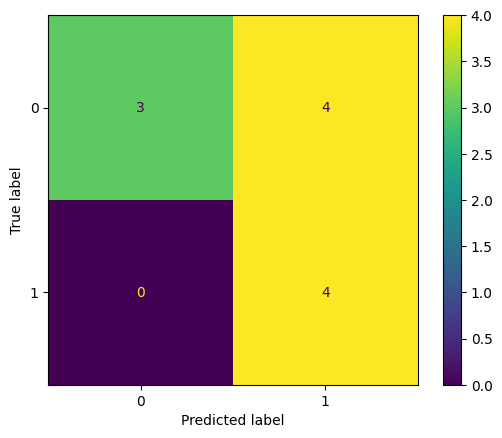

In [44]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Comment:
We don't expect the metrics to yield high values, as we're working with a very limited sample of the available data, and there has been no optimization or handling of the imbalanced nature of the labels.